# Perturbed Random Walk
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set()

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}

## Simple Random Walk
___
For more details, see `simple-random-walk.ipynb`.

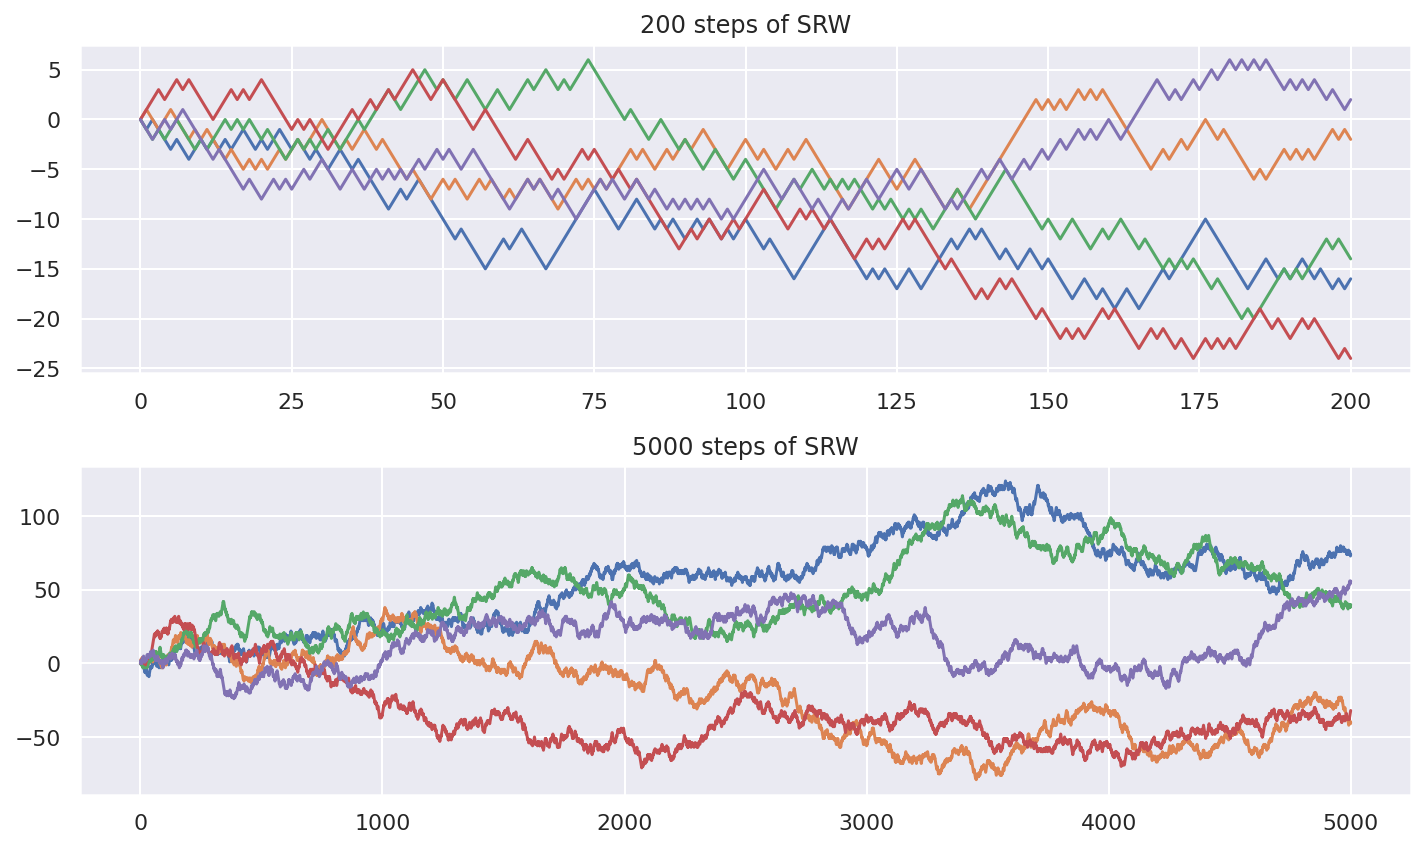

CPU times: user 650 ms, sys: 341 ms, total: 991 ms
Wall time: 646 ms


In [2]:
%%time
steps = [200, 5000]
num = 5

plt.figure(figsize=(10, 6))
for i, step in enumerate(steps, start=1):
    plt.subplot(2, 1, i)
    for _ in range(num):
        x = 0
        process = [x]
        for _ in range(step):
            d = random.choices((-1, 1), weights=(1, 1))[0]
            x += d
            process.append(x)
        plt.plot(process)
    plt.title(f'{step} steps of SRW')
plt.tight_layout()
plt.show()

By the central limit theorem, SRW $S_n$ converges in law to $N(0, n)$, or $S_n / \sqrt{n}$ does to $N(0, 1)$. (I draw former.)

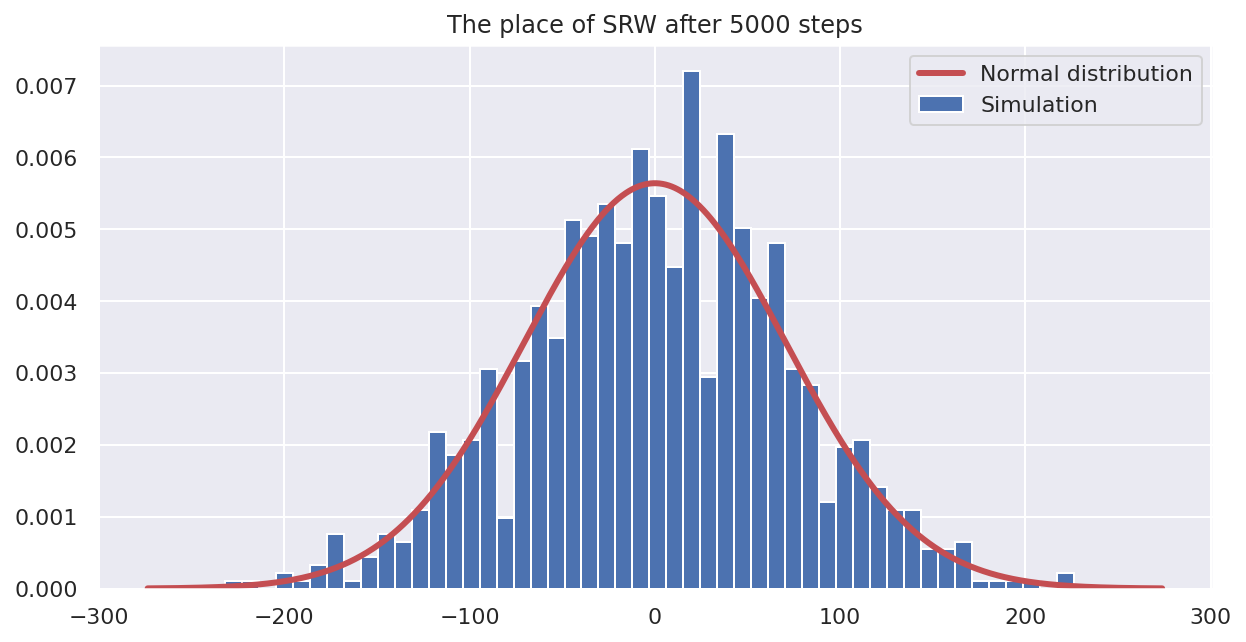

CPU times: user 23.2 s, sys: 18.4 ms, total: 23.2 s
Wall time: 23.2 s


In [3]:
%%time
step = 5000 # n
num = 1000

plt.figure(figsize=(10, 5))
goals = []
for _ in range(num):
    y = 0
    for _ in range(step):
        d = random.choices((-1, 1), weights=(1, 1))[0]
        y += d
    goals.append(y)
plt.hist(goals, bins=50, density=True, label='Simulation')

ran = 5 * np.sqrt(3000)
x = np.linspace(-ran, ran, 1000)
normal = 1 / (np.sqrt(2 * np.pi * step)) * np.exp(- x**2  / (2*step))
plt.plot(x, normal, color='r', linewidth=3, label='Normal distribution')

plt.title(f'The place of SRW after {step} steps')
plt.legend()
plt.show()

## Perturbed Random Walk
___

### Periodic case
$$ P(S_{n+1} = S_n + 1 | S_n \text{ is even}) = P(S_{n+1} = S_n - 1 | S_n \text{ is odd}) = 0.9, $$
$$ P(S_{n+1} = S_n + 1 | S_n \text{ is odd}) = P(S_{n+1} = S_n - 1 | S_n \text{ is even}) = 0.1.$$

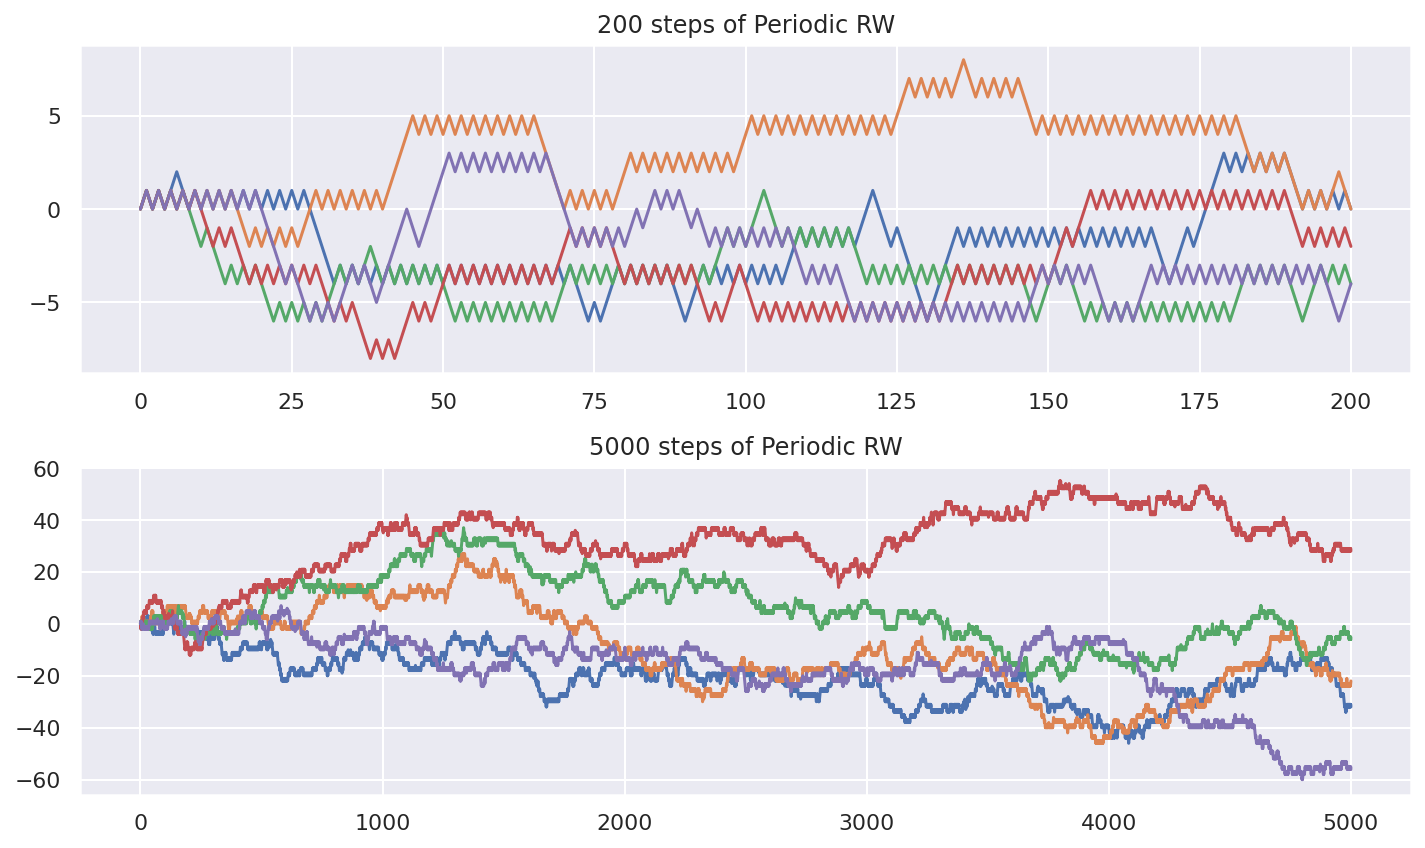

CPU times: user 2.65 s, sys: 272 ms, total: 2.92 s
Wall time: 2.57 s


In [4]:
%%time
steps= [200, 5000]
num = 5

plt.figure(figsize=(10, 6))
for i, step in enumerate(steps, start=1):
    plt.subplot(2, 1, i)
    for _ in range(num):
        x = 0
        process = [x]
        for __ in range(step):
            if x % 2 == 0:
                d = random.choices((-1, 1), weights=(1, 9))[0]
            else:
                d = random.choices((-1, 1), weights=(9, 1))[0]
            x += d
            process.append(x)
        plt.plot(process)
    plt.title(f'{step} steps of Periodic RW')

plt.tight_layout()
plt.show()

Compared to simple random walks, the periodic random walks after 5000 steps are **not go far away**. (SRWs go to $\pm{150}$, but periodic RWs travel only to $\pm{50}$.)

### Periodic case | step distance modified
I see $h(S_n)$, where
$$ h(2k) = 2k, \, h(2k+1) = 2k+0.2 \, \, (k \in \mathbb{Z}).$$ (It is very trivial change!)

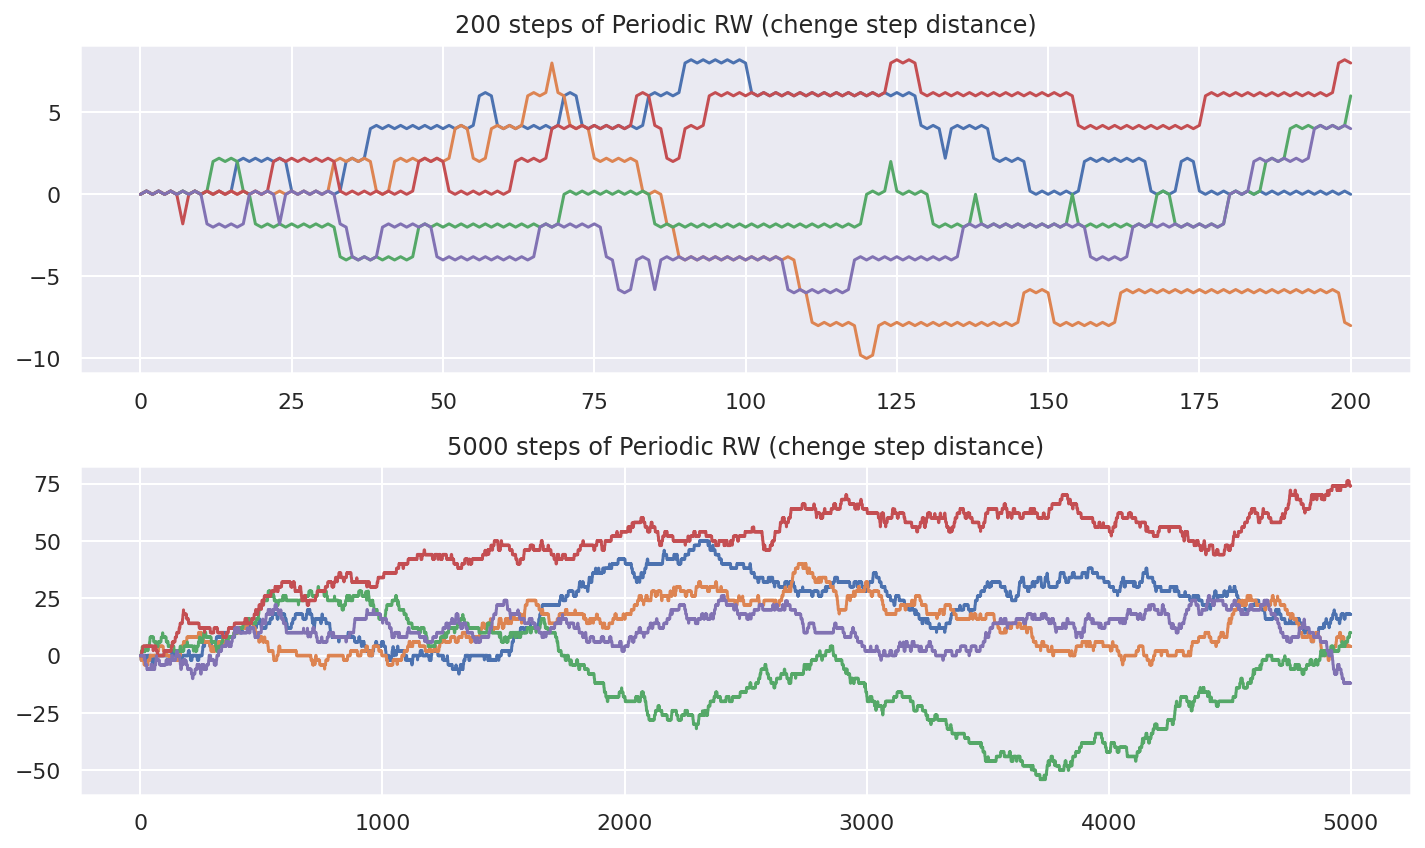

CPU times: user 2.08 s, sys: 334 ms, total: 2.41 s
Wall time: 2.06 s


In [5]:
%%time
steps = [200, 5000]
num = 5

plt.figure(figsize=(10, 6))
for i, step in enumerate(steps, start=1):
    plt.subplot(2, 1, i)
    for _ in range(num):
        x = 0
        process = [x]
        for __ in range(step):
            if x % 2 == 0:
                d = random.choices((-1, 1), weights=(1, 9))[0]
            else:
                d = random.choices((-1, 1), weights=(9, 1))[0]
            x += d
            if x % 2 == 0:
                process.append(x)
            else:
                process.append(x-0.8)
        plt.plot(process)
    plt.title(f'{step} steps of Periodic RW (chenge step distance)')

plt.tight_layout()
plt.show()

$\text{E}[h(S_1)] = 0$ and $\text{Var}(h(S_1)) = 0.36$.

By the central limit theorem, therefore, the Periodic RW $h(S_n)$ converges in law to $N(0, 0.36n)$, or $h(S_n) / 0.6 \sqrt{n}$ does to $N(0, 1)$. (**Slower to spread than SRW!**) (I drew former.)

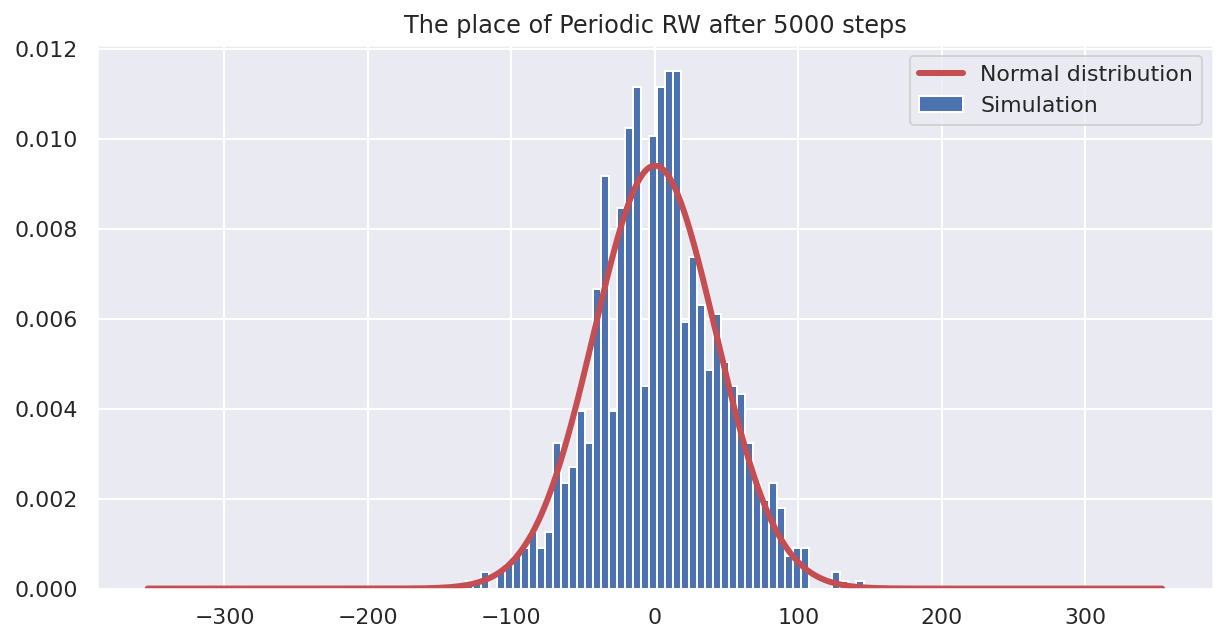

CPU times: user 21.6 s, sys: 3.78 ms, total: 21.6 s
Wall time: 21.6 s


In [6]:
%%time
step = 5000
num = 1000

plt.figure(figsize=(10, 5))
goals = []
for _ in range(num):
    x = 0
    for __ in range(step):
        if x % 2 == 0:
            d = random.choices((-1, 1), weights=(1, 9))[0]
        else:
            d = random.choices((-1, 1), weights=(9, 1))[0]
        x += d
    if x % 2 == 0:
        goals.append(x)
    else:
        goals.append((x-0.8))

plt.hist(goals, bins=50, density=True, label='Simulation')

ran = 5 * np.sqrt(step)
x = np.linspace(-ran, ran, 1000)
normal = 1 / (np.sqrt(2 * np.pi * 0.36*step)) * np.exp(- x**2  / (2*0.36*step))
plt.plot(x, normal, color='r', linewidth=3, label='Normal distribution')

plt.title(f'The place of Periodic RW after {step} steps')
plt.legend()

plt.show()

## Perturbed random walk on random media
___

Let $(P_m)_{m\in \mathbb{z}}$ is i.i.d., $(0, 1)$ valued random variable which distribution is symmetric around $1/2$. 
and $$P(S_{n+1}) = m+1 | S_n = m, P_m = p) = p.$$
In this simulation, $P_m = 0.9 \, \text{or} \, 0.1.$

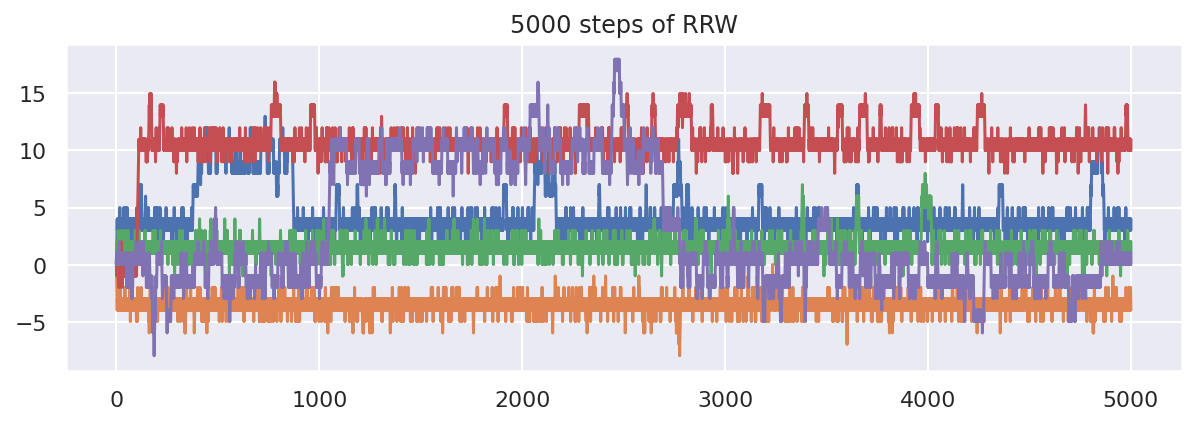

CPU times: user 516 ms, sys: 311 µs, total: 516 ms
Wall time: 506 ms


In [7]:
%%time

HIGH = 1
LOW = 0

step = 5000
num = 5

high_value = 0.9
law_value = 1 - high_value

plt.figure(figsize=(10, 3))

for _ in range(num):
    x = 0
    process = [x]
    place = {0:random.choice([HIGH, LOW])}
    for _ in range(step):
        if x not in place:
            place[x] = random.choice([HIGH, LOW])
        if place[x] == HIGH:
            s = random.choices([1, -1], weights=(high_value, law_value))[0]
        else:
            s = random.choices([1, -1], weights=(law_value, high_value))[0]
        x += s
        process.append(x)
    plt.plot(process)
plt.title(f'{step} steps of RRW')
plt.show()
    

Sinai shows the following:
$$P\left(\frac{S_n}{(\log n)^2} \le M\right) \to 0 \,\, (n, M \to \infty).$$

*Remark*  
- if $S_n$ is SRW, the above equation is not hold and if you replace $(\log n)^2$ with $\sqrt{n}$, it is true.
- $S_n / (\log n)^2$ do not always converge in distribution to normal distribution. 

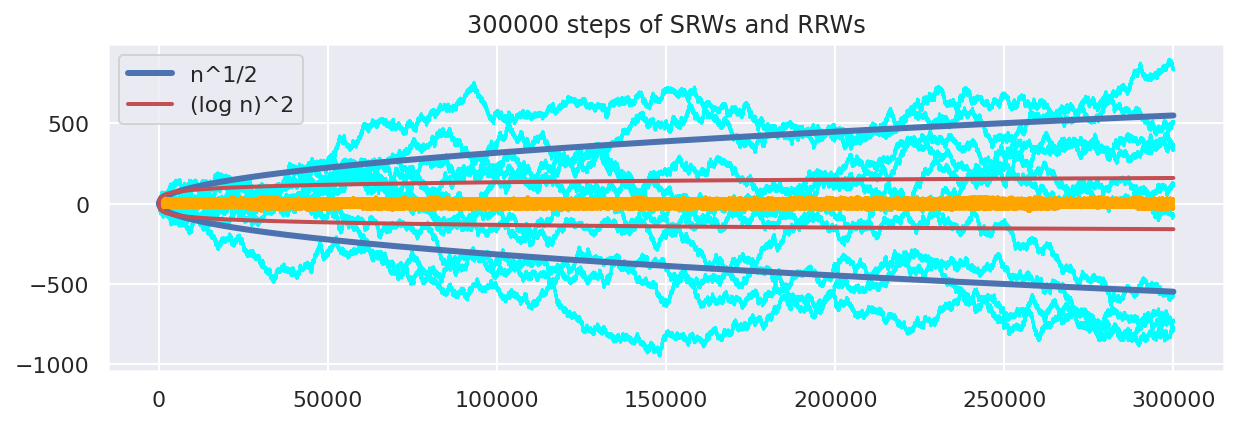

CPU times: user 31.8 s, sys: 577 ms, total: 32.4 s
Wall time: 32.4 s


In [8]:
%%time

HIGH = 1
LOW = 0

step = 300000
num = 10

high_value = 0.9
law_value = 1 - high_value

plt.figure(figsize=(10, 3))
t = np.arange(3, step+1)

# Simple    
for _ in range(num):
    x = 0
    process = [x]
    for _ in range(step):
        d = random.choices((-1, 1), weights=(1, 1))[0]
        x += d
        process.append(x)
    plt.plot(process, color='cyan')
x_the = np.sqrt(t)
plt.plot(t, x_the, color='b', linewidth=3, label='n^1/2')
plt.plot(t, -x_the, color='b', linewidth=3)

# Perturbed
for _ in range(num):
    x = 0
    process = [x]
    place = {0:random.choice([HIGH, LOW])}
    for _ in range(step):
        if x not in place:
            place[x] = random.choice([HIGH, LOW])
        if place[x] == HIGH:
            s = random.choices([1, -1], weights=(high_value, law_value))[0]
        else:
            s = random.choices([1, -1], weights=(law_value, high_value))[0]
        x += s
        process.append(x)
    plt.plot(process, color='orange')

x_the = np.log(t) ** 2
plt.plot(t, x_the, color='r', linewidth=2, label='(log n)^2')
plt.plot(t, -x_the, color='r', linewidth=2)
plt.title(f'{step} steps of SRWs and RRWs')
plt.legend()
plt.show()